In [1]:
import pandas
import pycaret.regression as regression

In [3]:
train_df = pandas.read_csv("train.csv")
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [16]:
train_dropped_df = train_df.drop(columns=["datetime", "casual", "registered"])
train_dropped_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,0,1,9.84,14.395,81,0.0000,16
1,1,0,0,1,9.02,13.635,80,0.0000,40
2,1,0,0,1,9.02,13.635,80,0.0000,32
3,1,0,0,1,9.84,14.395,75,0.0000,13
4,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336
10882,4,0,1,1,14.76,17.425,57,15.0013,241
10883,4,0,1,1,13.94,15.910,61,15.0013,168
10884,4,0,1,1,13.94,17.425,61,6.0032,129


In [17]:
regression.setup(train_dropped_df, target="count")

,Description,Value
0,Session id,6668
1,Target,count
2,Target type,Regression
3,Original data shape,"(10886, 9)"
4,Transformed data shape,"(10886, 9)"
5,Transformed train set shape,"(7620, 9)"
6,Transformed test set shape,"(3266, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [18]:
regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,107.3440,21822.2333,147.6182,0.3467,1.2980,4.5124,0.0630
gbr,Gradient Boosting Regressor,110.3842,22617.9243,150.2787,0.3232,1.3244,4.7022,0.0480
rf,Random Forest Regressor,110.5364,24388.5339,156.0946,0.2696,1.2823,4.3171,0.1760
lasso,Lasso Regression,118.2969,25008.9425,158.0551,0.2520,1.3815,5.0386,0.0070
llar,Lasso Least Angle Regression,118.2969,25008.9596,158.0552,0.2520,1.3816,5.0386,0.0070
lr,Linear Regression,118.3055,25013.1565,158.0688,0.2519,1.3818,5.0239,0.0070
ridge,Ridge Regression,118.3054,25013.1428,158.0687,0.2519,1.3818,5.0239,0.0070
lar,Least Angle Regression,118.3055,25013.1555,158.0688,0.2519,1.3818,5.0239,0.0060
br,Bayesian Ridge,118.2871,25012.2088,158.0653,0.2519,1.3818,5.0319,0.0060
en,Elastic Net,118.3814,25068.8300,158.2404,0.2503,1.3817,5.1018,0.0060


LGBMRegressor(n_jobs=-1, random_state=6668)

In [19]:
model = regression.create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,102.3888,19287.6309,138.8799,0.4381,1.3561,5.3492
1,100.5539,19611.0491,140.0395,0.3924,1.2486,3.9936
2,106.7112,21768.6043,147.5419,0.3131,1.3120,4.5781
3,104.6322,21115.3718,145.3113,0.3804,1.3185,4.7104
4,113.4444,24145.9073,155.3895,0.3343,1.3469,4.5560
5,109.2051,23162.2563,152.1915,0.3606,1.2411,3.8032
6,108.2386,21737.7267,147.4372,0.3248,1.3421,4.8983
7,110.3096,22364.3467,149.5471,0.3100,1.2248,3.9802
8,105.3980,20662.4113,143.7443,0.3440,1.2799,4.3025


In [20]:
tuned_model = regression.tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,105.1823,19830.3375,140.8202,0.4223,1.3723,5.5001
1,101.1818,19675.0321,140.2677,0.3904,1.2532,3.9985
2,107.7760,22107.0687,148.6845,0.3024,1.3254,4.5986
3,106.5153,21610.5116,147.0051,0.3659,1.3288,4.7779
4,113.8874,24538.7609,156.6485,0.3234,1.3516,4.6602
5,110.2724,23360.0414,152.8399,0.3552,1.2441,3.7541
6,109.0920,21877.9150,147.9118,0.3204,1.3512,4.9723
7,111.8878,22863.2353,151.2059,0.2946,1.2455,4.0241
8,105.3585,20718.2373,143.9383,0.3422,1.2907,4.5493


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


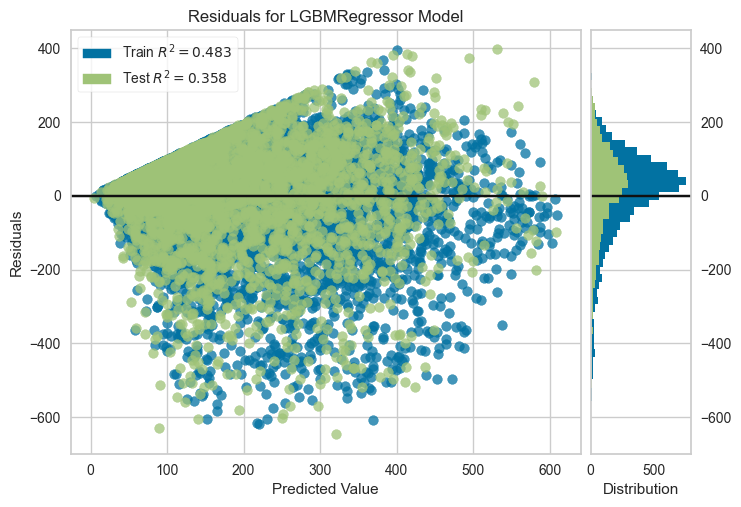

In [21]:
regression.plot_model(tuned_model)

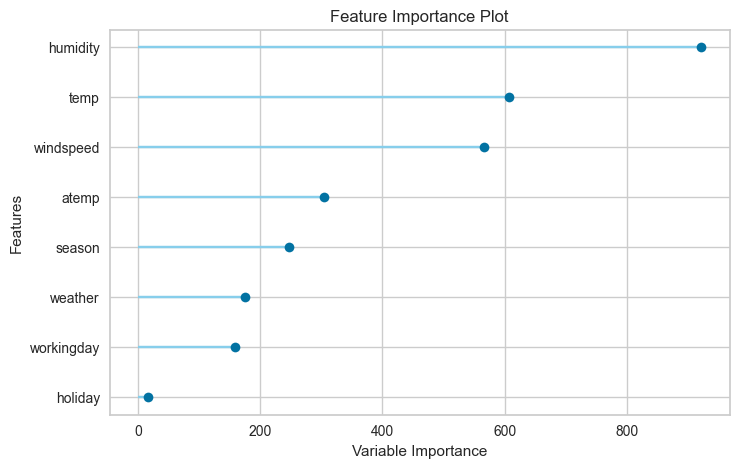

In [22]:
regression.plot_model(tuned_model, plot="feature")

In [23]:
final_model = regression.finalize_model(tuned_model)

In [24]:
test_df = pandas.read_csv("test.csv")
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [25]:
test_dropped_df = test_df.drop(columns=["datetime"])
test_dropped_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,1,1,10.66,11.365,56,26.0027
1,1,0,1,1,10.66,13.635,56,0.0000
2,1,0,1,1,10.66,13.635,56,0.0000
3,1,0,1,1,10.66,12.880,56,11.0014
4,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014
6489,1,0,1,2,10.66,12.880,60,11.0014
6490,1,0,1,1,10.66,12.880,60,11.0014
6491,1,0,1,1,10.66,13.635,56,8.9981


In [26]:
predict_df = regression.predict_model(final_model, test_df)
predict_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,prediction_label
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002701,110.672234
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.000000,67.141666
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.000000,67.141666
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,86.301248
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,86.301248
...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.001400,107.624543
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.001400,107.624543
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.001400,91.273461
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.998100,85.934801


In [31]:
submit_df = test_df[["datetime"]]
submit_df = submit_df.join(predict_df["prediction_label"])
submit_df.columns = ["datetime", "count"]
submit_df["count"] = submit_df["count"].astype("int")
submit_df

,datetime,count
0,2011-01-20 00:00:00,110
1,2011-01-20 01:00:00,67
2,2011-01-20 02:00:00,67
3,2011-01-20 03:00:00,86
4,2011-01-20 04:00:00,86
...,...,...
6488,2012-12-31 19:00:00,107
6489,2012-12-31 20:00:00,107
6490,2012-12-31 21:00:00,91
6491,2012-12-31 22:00:00,85


In [32]:
submit_df.to_csv("submit.csv", index=False)